<a href="https://colab.research.google.com/github/longbui23/Amazon-Sentiment-Analysis/blob/main/Amazon_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AMAZON SENTIMENT ANALYSIS ON PHONE PAYMENTS**

  <a id="top"></a>
    <div class="list-group" id="list-tab" role="tablist">
    <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>
        
* [1. Dataset and Libraries](#1)
  - [a. Import Libraries and Dataset](#1a)
  - [b. Data Inspection](#1b)
* [2. Data Cleaning](#2)
* [3. Visualizations](#3)

<a id="1"></a>
<font color="blue" size=+2.5><b>1. Datasets and Libraries</b></font>

<a id="1a"></a>
<font color="black" size=+1.5><b>a. Import Dataset and Library</b></font>

In [32]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis


In [33]:
#import packages
#data cleaning
import numpy as np
import pandas as pd
import statsmodels

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#import data
df = pd.read_csv("Data/Amazon_Unlocked_Mobile.csv")
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


<a id="1b"></a>
<font color="black" size=+1.5><b>b. Data Inspection</b></font>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Product Name   413840 non-null  object 
 1   Brand Name     348669 non-null  object 
 2   Price          407907 non-null  float64
 3   Rating         413840 non-null  int64  
 4   Reviews        413778 non-null  object 
 5   Review Votes   401544 non-null  float64
 6   Review Length  413778 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 22.1+ MB


In [ ]:
df.isnull().sum()

Product Name         0
Brand Name       65171
Price             5933
Rating               0
Reviews             62
Review Votes     12296
Review Length       62
dtype: int64

In [ ]:
df['Review Length'] = df['Reviews'].str.len()

In [ ]:
df[df['Reviews'].isnull()]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length
6428,"Apple Iphone 4 - 8gb Sprint (CDMA) White, Smar...",NaN,NaN,4,NaN,2.0,NaN
12533,Apple iPhone 4S 16GB 3G WiFi White Smartphone ...,NaN,74.95,1,NaN,0.0,NaN
13024,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,4,NaN,3.0,NaN
13533,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,5,NaN,2.0,NaN
14651,Apple iPhone 4S 32GB Unlocked GSM Smartphone w...,NaN,NaN,4,NaN,3.0,NaN
...,...,...,...,...,...,...,...
368836,Samsung Galaxy S6 SM-G920i Factory Unlocked Ce...,samsung,429.99,4,NaN,48.0,NaN
369106,"Samsung Galaxy S6 SM-G920i Unlocked Cellphone,...",Samsung,479.99,4,NaN,48.0,NaN
369670,"Samsung Galaxy S6 SM-G920i Unlocked Cellphone,...",Samsung,479.99,4,NaN,48.0,NaN
379690,"Samsung N920 Unlocked Galaxy Note 5, GSM 32GB ...",Samsung,561.50,5,NaN,2.0,NaN


In [ ]:
df['Reviews'] = df['Reviews'].fillna("")
df['Review Length'] = df['Review Length'].fillna(0)

In [ ]:
df.describe()

,Price,Rating,Review Votes,Review Length
count,407907.000000,413840.000000,401544.000000,413840.000000
mean,226.867155,3.819578,1.507237,216.674125
std,273.006259,1.548216,9.163853,463.572961
min,1.730000,1.000000,0.000000,0.000000
25%,79.990000,3.000000,0.000000,28.000000
50%,144.710000,5.000000,0.000000,93.000000
75%,269.990000,5.000000,1.000000,223.000000
max,2598.000000,5.000000,645.000000,29419.000000


<ipython-input-10-9af915f80fa9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axes[1] = sns.barplot(
<ipython-input-10-9af915f80fa9>:22: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  axes[1] = sns.barplot(


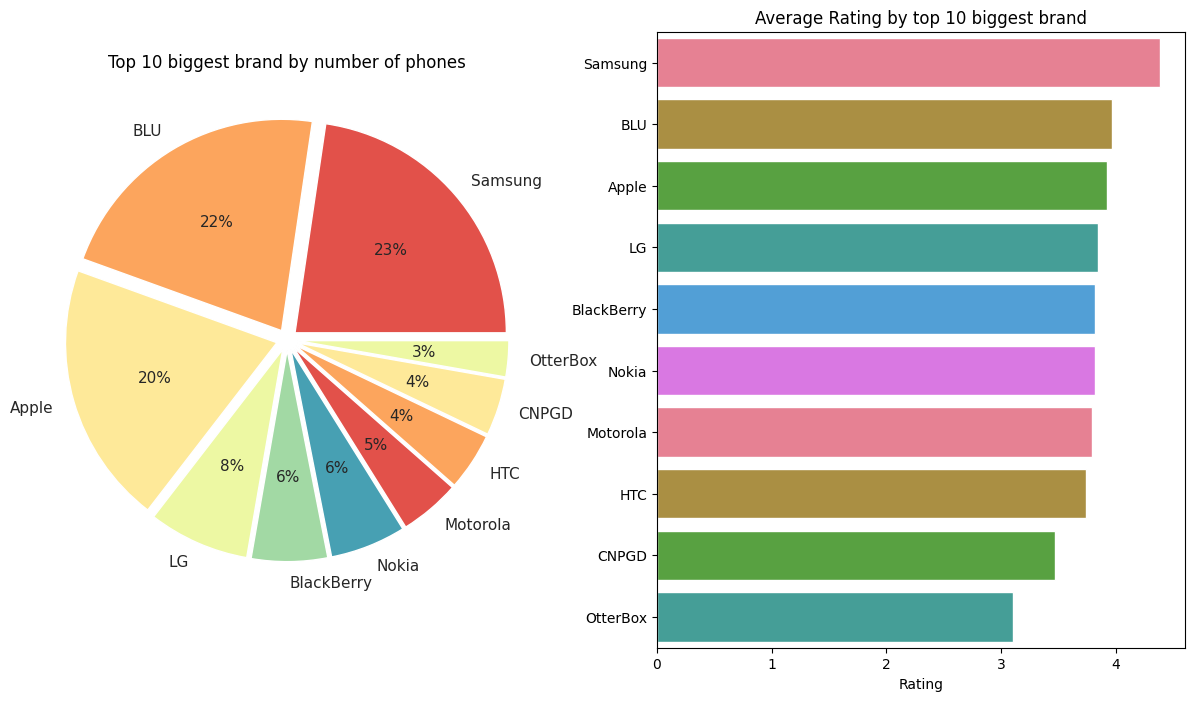

In [ ]:
#Plot style
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})

# Brand distribution
brand_df = df.groupby("Brand Name").agg({'Brand Name':'count','Rating':'mean'}).rename(
    columns={"Brand Name": "Count"}).sort_values(by='Count',ascending=False).head(10)

#pie-plot for number of phones ordered by brand
axes[0].pie(
    data=brand_df,
    x = 'Count',
    labels=brand_df.index,
    autopct = '%1.0f%%',
    textprops = {'fontsize':11},
    colors= sns.color_palette("Spectral"),
    explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,]
)
axes[0].set_title('Top 10 biggest brand by number of phones')

#bar-plot for top 10 biggest brand
axes[1] = sns.barplot(
    data=brand_df.sort_values('Rating', ascending=False),
    x='Rating',
    y=brand_df.index,

    palette = sns.color_palette("husl"),
)
axes[1].set_title('Average Rating by top 10 biggest brand')
axes[1].set(ylabel=None)


#display
plt.show()

<ipython-input-11-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

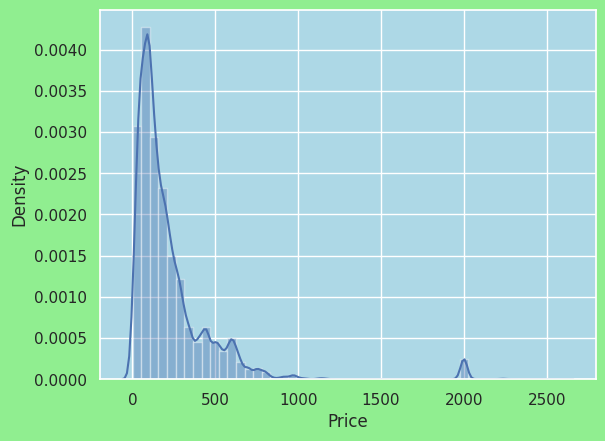

In [ ]:
sns.distplot(df['Price'])

   <a id="2"></a>
<font color="tblue" size=+2.5><b>2. Data Cleaning</b></font>

In [ ]:
df[df['Brand Name'].isnull()]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length
110,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,2,when i got phone it wouldn't work I took it to...,0.0,186.0
111,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,4,I liked,0.0,7.0
112,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,5,Great. Arrived quickly.,0.0,23.0
113,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,4,"Phone works great, you may have to get a sum c...",0.0,86.0
114,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,5,Avianna LLC is an incredible seller. The phone...,0.0,567.0
...,...,...,...,...,...,...,...
413097,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,5,EXCELENTE,0.0,9.0
413098,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,2,Not as expected so I returned this phone,0.0,40.0
413099,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,5,very well,0.0,9.0
413100,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,5,excelente,0.0,9.0


In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'CBSKY®': 'CBSKY'})

In [ ]:
first_words = df['Product Name'].str.split().str[0]

In [ ]:
df['Brand Name'].fillna(first_words, inplace=True)

In [ ]:
brand_counts = df['Brand Name'].value_counts().sort_index()
print(brand_counts.head())

((Unlocked))BlackBerry      8
2.45                        2
4                         158
4G                          2
4G-Unlocked                 7
Name: Brand Name, dtype: int64


In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'BLACK': 'BLACKBERRY', 'Black Berry':'BLACKBERRY', 'BlackBerry':'BLACKBERRY', 'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD':'BLACKBERRY','Blackberrry':'BLACKBERRY','Blackberry': 'BLACKBERRY'})

In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'((Unlocked))BlackBerry': 'BLACKBERRY'})

In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'Boost Mobile': 'Boost'})

In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'ASUS Computers': 'ASUS'})

In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'Asus': 'ASUS'})

In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'ATT': 'AT&T'})

In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'Amazon.com, LLC *** KEEP PORules ACTIVE ***': 'Amazon'})

In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'Apple Computer': 'Apple'})

In [ ]:
df.to_csv('df1.csv', index=False)